# Smearing Notebook for CASSY Data Files

This notebook smears .txt data files obtained with the CASSY software for the experiment:
- Attenutation of Gamma Radiation in Matter

Since everyone is provided the same data files, it is recommended that you randomly smear your data first to individualise it.

For the smearing, the counts ($N$) of every bin in the spectrum are randomly smeared by their Poissonion error ($\sqrt{N}$). The channel positions are not smeared.

You should only perform the smearing **once** per data file, when you first receive your data. You should execute this smearing script for **every** single data file individually. **The smeared output files from this notebook should be used for subsequent analysis steps of the experiment.**

Please take a note of the maximum values in the data files before and after smearing to check that everything worked ok - see steps 12 and 13 below and note down the numbers for each file you smear.

**Breakdown of the code cells in this notebook:**

- Step 1: Import various program modules

- Step 2: Enter input file name and extract the data. Before running this step, be sure that your input data file is uploaded to the correct folder. Either upload the file to the same folder as this notebook and put no path to the file in the file name field of the code, or create a folder and be sure that the correct path to the folder is set when entering the file name. For example, a folder called **"Example_Data"** has been created where data was uploaded for these examples. The smeared output data files from this notebook are subsequently saved in the same folder as the input file

- Step 3: The smeared data will be saved to a new output file. The location of the output file will be the same as the location of the input file. The file name will be the same as the input file, but it will be appended with "_Smeared.txt" at the end. The output files XXXX_Smeared.txt are the ones to analyse for the rest of the experiment

- Step 4: The length of the data file is checked

- Step 5: A subset of the data is checked

- Step 6: The inputted data is plotted as a spectrum of counts against MCA channel number

- Step 7: Define the smearing function

- Step 8: Check one row of the data before smearing

- Step 9: Check the same row of the data after smearing

- Step 10: Smear all the data

- Step 11: Plot the smeared spectrum (yellow) on top of the original spectrum (blue)

- Step 12: Check the maximum value in the data before smearing

- Step 13: Check the maximum value in the data after smearing

- Step 14: Reading the input file

- Step 15: Getting the header of the file

- Step 16: Checking the format of the header

- Step 17: Writing of the output file

In [1]:
# import the relevant libraries
import copy
import numpy as np
import scipy
import matplotlib.pylab as plt

In [2]:
# Set the input file name, and get the data
filename = './Example_Data/Example_Cs137_from_CASSY.txt'
data = np.genfromtxt(filename,
                    skip_header=5,
                    delimiter='\t')
print("The input data file is:")
print(filename)
print("")

The input data file is:
./Example_Data/Example_Cs137_from_CASSY.txt



In [3]:
# Set the output file name to be the same as the input file name but appended by _Smeared.
# The output file will lie in the same folder as the input file.
output_filename = filename.split(".txt")[0]+"_Smeared"+".txt"
print("The output smeared data file is:")
print(output_filename)
print("")

The output smeared data file is:
./Example_Data/Example_Cs137_from_CASSY_Smeared.txt



In [4]:
len(data)            # check the length of the data to be sure the data file is not empty

601

In [5]:
data[:10]           # have a look at a sample of the data

array([[  0.        ,   0.        ,   0.        ,   0.        ,
        795.0546875 ],
       [  1.        ,   1.        ,   1.        ,   1.        ,
        792.7265625 ],
       [  2.        , 275.        ,   2.        ,   2.        ,
        791.95052083],
       [  3.        , 554.        ,   3.        ,   3.        ,
        805.91927083],
       [  4.        , 654.        ,   4.        ,   4.        ,
        794.66666667],
       [  5.        , 781.        ,   5.        ,   5.        ,
        795.83072917],
       [  6.        , 793.        ,   6.        ,   6.        ,
        795.83072917],
       [  7.        , 870.        ,   7.        ,   7.        ,
        796.60677083],
       [  8.        , 953.        ,   8.        ,   8.        ,
        796.60677083],
       [  8.999     , 991.        ,   9.        ,   9.        ,
        797.77083333]])

(0.0, 4612.3)

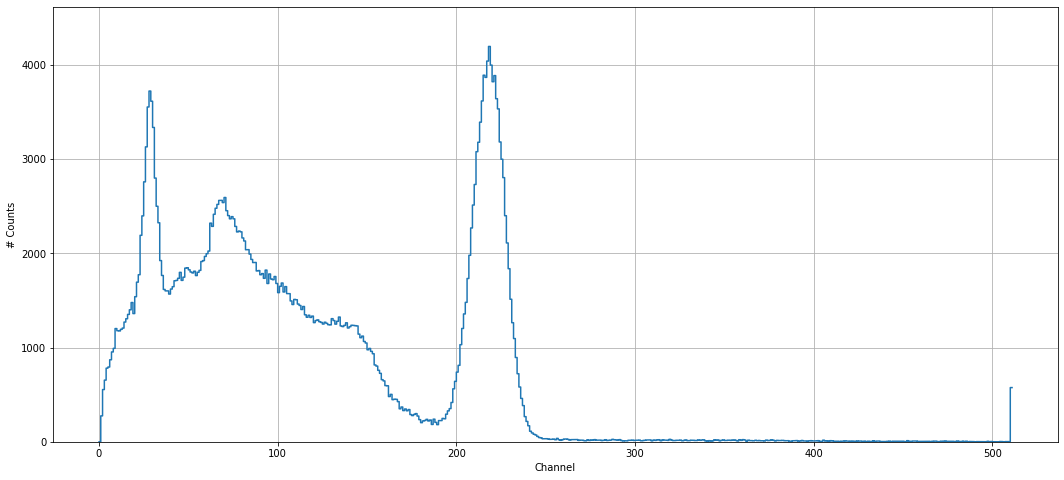

In [6]:
# plot the data to see how it looks before smearing
fig, ax = plt.subplots(figsize=(18, 8))
x = data[:,3] # channel
y = data[:,1] # counts 
ax.step(x, y)
ax.grid()
ax.set_xlabel('Channel')
ax.set_ylabel('# Counts')
ax.set_ylim([0, max(y)*1.1]) # set y - axis value

In [7]:
# define the smearing function
def smear(y):
    line = copy.deepcopy(y)
    if line[1]>=0:
        output = line[1] + (((np.random.rand()*2)-1)*np.sqrt(line[1])) # using the poissonian errors on the counts to smear
        line[1] = int(np.abs(output))
    return line

In [8]:
# check one row of the data before smearing
data[214]

array([ 214.        , 3390.        ,  214.        ,  214.        ,
        796.60677083])

In [9]:
# apply the smearing to this row and check how it changes
smear(data[214])

array([ 214.        , 3437.        ,  214.        ,  214.        ,
        796.60677083])

In [10]:
# smear all the data
data_smeared = np.array([smear(y) for y in data])

(0.0, 4545.200000000001)

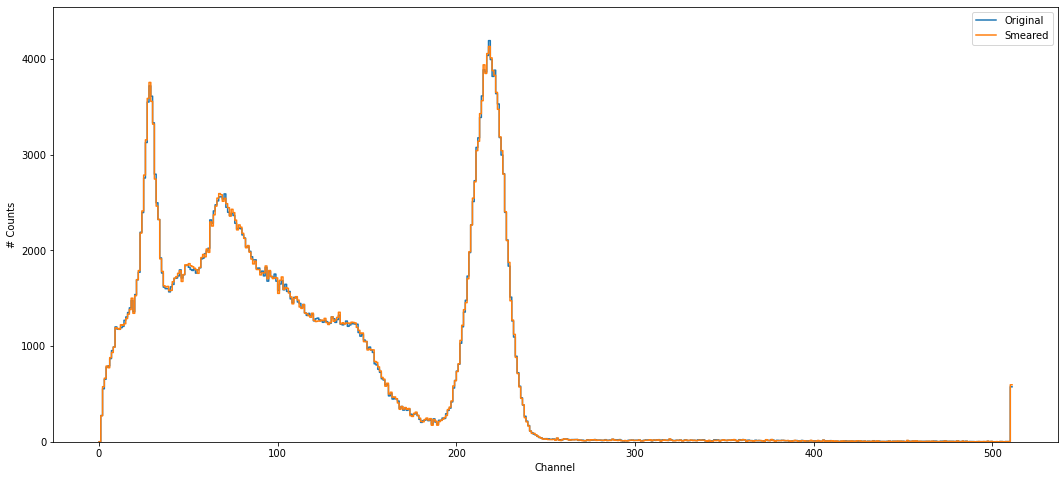

In [11]:
# plot the smeared data (yellow) on top of the un-smeared data (blue)
s = [0.01, 0.1, 0.5, 1, 10]

fig, ax = plt.subplots(figsize=(18, 8))
x = data[:,3] # channel
y = data[:,1] # counts 
ax.step(x, y, label='Original')

x = data_smeared[:,3] # channel
y = data_smeared[:,1] # counts 
ax.step(x, y, label='Smeared')

ax.grid()
ax.set_xlabel('Channel')
ax.set_ylabel('# Counts')
ax.grid()
ax.legend()
ax.set_ylim([0, max(y)*1.1]) # set y - axis value

In [12]:
# Check the maximum value in the unsmeared data
print("Max value before smearing is:")
max(data_smeared[:,1])

Max value before smearing is:


4132.0

In [13]:
# Check the maximum value in the smeared data, it should have changed
print("Max value after smearing is:")
max(data[:,1])

Max value after smearing is:


4193.0

In [14]:
# reading all the lines of the input file
with open(filename, 'r') as f:
    content = f.readlines()

In [15]:
# getting the header of the file
header = content[:5]

In [16]:
# checking the header of the file
header

['\ufeffMIN=0\t0\t0\t0\t0\n',
 'MAX=600\t4641.58883361278\t511\t511\t2000\n',
 'SCALE=600\t5\t100\t500\t500\n',
 'DEC=0\t0\t0\t1\t0\n',
 'DEF="Time" t / s\t"Events" N_A\t"Channel" n_A\t"Energy" E_A / keV\t"Voltage" U_A / V\n']

In [17]:
# writing the output file
with open(output_filename, 'w') as f:
    for item in header:
        f.write(item)
        
    for item in data_smeared:        
        [f.write("{}\t".format(str(s))) for s in item]
        f.write("\n")